<style>       
    hr{
        height: 4px;
        background-color: rgb(247,148,9);
        border: none;
    }
</style>
<div style="color=white;
           display:fill;
           border-radius:5px;
           background-color:rgb(34,41,49)">
<hr>
<div align="right"><i>BTE5371 - Communication Technologies &nbsp;</i></div>
<div align="right">Andrea Ridolfi, EIT - BFH &nbsp;</div>

# Numerical Lab: Harmonic Carrier Modulations
<hr>
</div>

In [1]:
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

## AM

Text(0, 0.5, '$|\\hat{c}[k]|$')

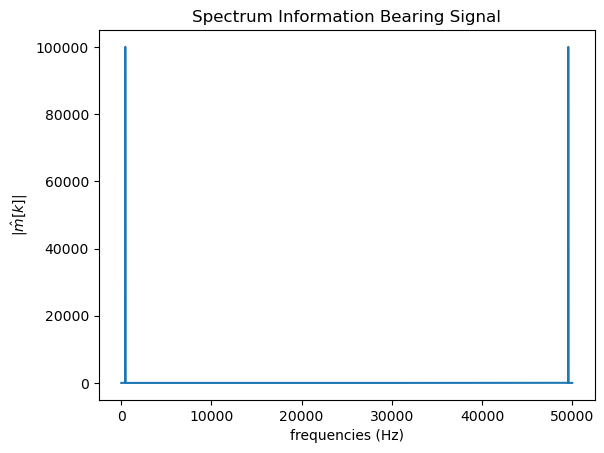

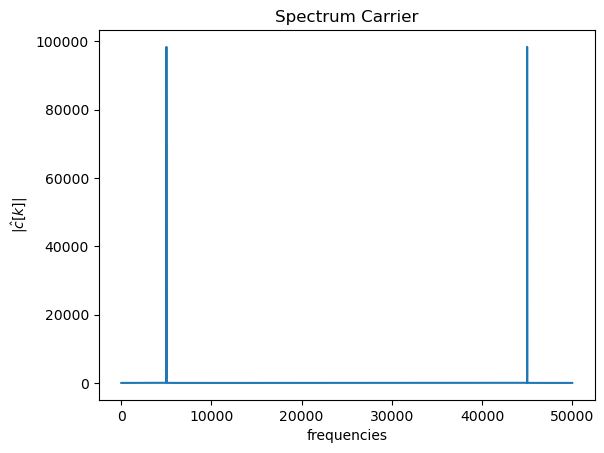

In [2]:
# information bearing signal
fs=50000
fm=440
T=4
N=fs*T
timeInstants=np.linspace(0,T,N)
frequencies=np.linspace(0,fs,N)
normFreq=np.linspace(0,1,N)

m=np.cos(2*np.pi*fm*timeInstants)

mFft=np.fft.fft(m)

plt.figure()
plt.plot(frequencies,np.abs(mFft))
plt.title('Spectrum Information Bearing Signal')
plt.xlabel('frequencies (Hz)')
plt.ylabel('$|\hat{m}[k]|$')

# carrier
fc=5000
c=np.cos(2*np.pi*fc*timeInstants)

cFft=np.fft.fft(c)

plt.figure()
plt.plot(frequencies,np.abs(cFft))
plt.title('Spectrum Carrier')
plt.xlabel('frequencies')
plt.ylabel('$|\hat{c}[k]|$')

### Modulation

Text(0, 0.5, '$|\\hat{s}[k]|$')

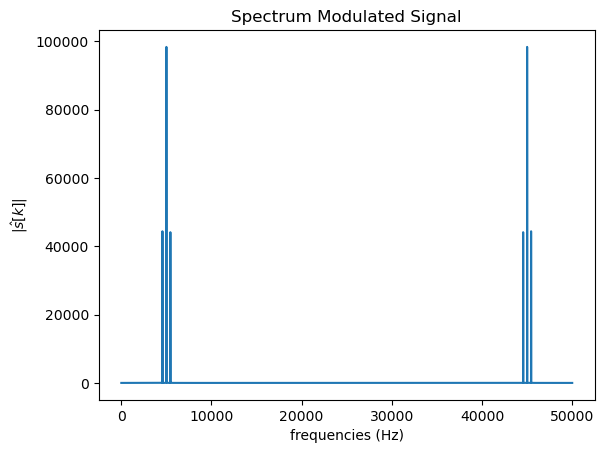

In [3]:
# modulated signal 
ka=0.9
s=(1+ka*m)*c

sFft=np.fft.fft(s)

plt.figure()
plt.plot(frequencies,np.abs(sFft))
plt.title('Spectrum Modulated Signal')
plt.xlabel('frequencies (Hz)')
plt.ylabel('$|\hat{s}[k]|$')

### Demodulation

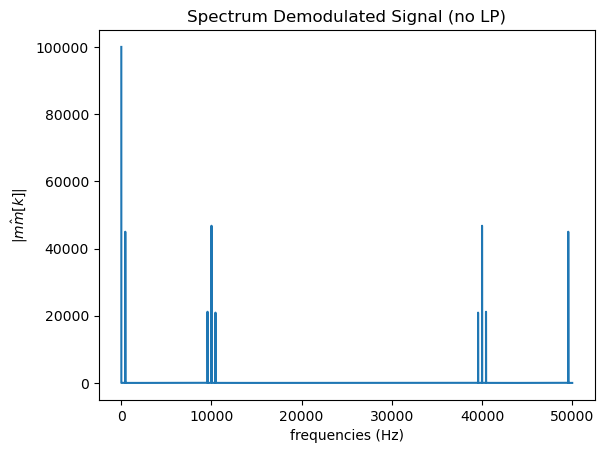

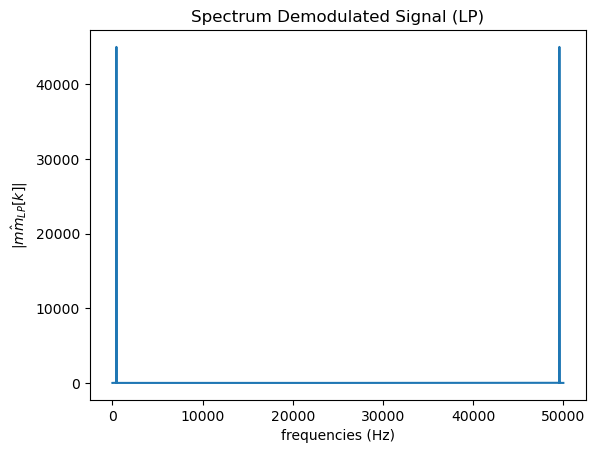

In [4]:
mm=s*c
mmFft=np.fft.fft(mm)

plt.figure()
plt.plot(frequencies,np.abs(mmFft))
plt.title('Spectrum Demodulated Signal (no LP)')
plt.xlabel('frequencies (Hz)')
plt.ylabel('$|\hat{mm}[k]|$')


f1=2*fm
index1=(N*f1)//fs
index2=N-index1
mmFftLP=mmFft
mmFftLP[index1:index2]=0
mmFftLP[0]=0
plt.figure()
plt.plot(frequencies,np.abs(mmFftLP))
plt.title('Spectrum Demodulated Signal (LP)')
plt.xlabel('frequencies (Hz)')
plt.ylabel('$|\hat{mm}_{LP}[k]|$')

mmLP=np.real(np.fft.ifft(mmFftLP))


## Quadrature AM

In [5]:
# information bearing signal
fs=50000
fm1=440
fm2=1318
T=4
N=fs*T
timeInstants=np.linspace(0,T,N)
frequencies=np.linspace(0,fs,N)
normFreq=np.linspace(0,1,N)

m1=np.cos(2*np.pi*fm1*timeInstants)
m2=np.cos(2*np.pi*fm2*timeInstants)

# carrier signals

c1=np.cos(2*np.pi*fc*timeInstants) # channel I
c2=np.sin(2*np.pi*fc*timeInstants) # channel Q


In [6]:
Audio(data=m1, rate=fs)

In [7]:
Audio(data=m2, rate=fs)

In [8]:
# modulation channel I + channel Q
s=m1*c1+m2*c2


In [9]:
# demodulation
mm1 = s*c1
mm2 = s*c2

mm1Fft=np.fft.fft(m1)
mm2Fft=np.fft.fft(m2)


f1=3000
index1=(N*f1)//fs
index2=N-index1

mm1FftLP=mm1Fft
mm1FftLP[index1:index2]=0
mm1FftLP[0]=0
mm1LP=np.real(np.fft.ifft(mm1FftLP))

mm2FftLP=mm2Fft
mm2FftLP[index1:index2]=0
mm2FftLP[0]=0
mm2LP=np.real(np.fft.ifft(mm2FftLP))



In [10]:
# demodulated signal I not low passed
Audio(data=mm1, rate=fs)

In [11]:
# demodulated signal Q not low passed
Audio(data=mm2, rate=fs)

In [12]:
# demodulated signal I low passed
Audio(data=mm1LP, rate=fs)

In [13]:
# demodulated signal Q low passed
Audio(data=mm2LP, rate=fs)

## Quadrature Modulation (Digital)

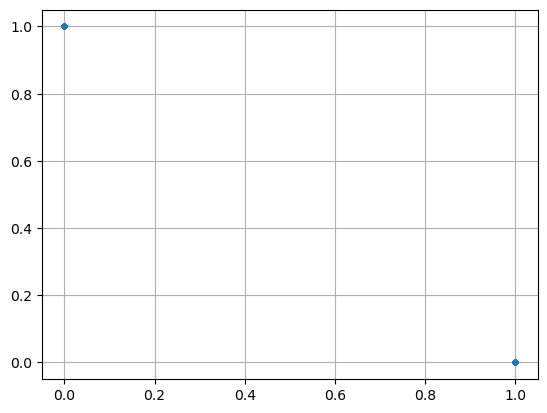

In [14]:
num_symbols = 1000
num_values = 2
message = np.random.randint(0, num_values, num_symbols) # 0 to 3
message_degrees = message*360/4 # 45, 135, 225, 315 degrees
message_radians = message_degrees*np.pi/180.0 # sin() and cos() takes in radians
signal_QM = np.cos(message_radians) + 1j*np.sin(message_radians) # this produces our QPSK complex symbols
plt.plot(np.real(signal_QM), np.imag(signal_QM), '.')
plt.grid(True)
plt.show()

## Addittive Noise

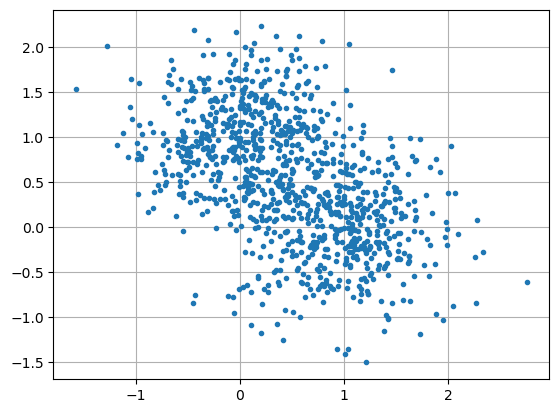

In [15]:
noise = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.5
signal_QM_noisy = signal_QM + noise * np.sqrt(noise_power)
plt.plot(np.real(signal_QM_noisy), np.imag(signal_QM_noisy), '.')
plt.grid(True)
plt.show()

## Phase noise

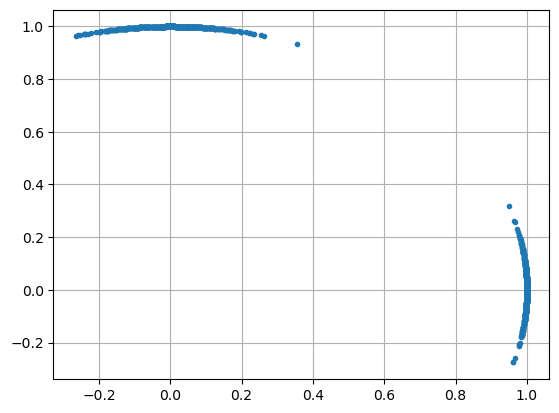

In [16]:
phase_noise = np.random.randn(len(message)) * 0.1 # adjust multiplier for "strength" of phase noise
signal_QM_noisyPhase = signal_QM * np.exp(1j*phase_noise)
plt.plot(np.real(signal_QM_noisyPhase), np.imag(signal_QM_noisyPhase), '.')
plt.grid(True)
plt.show()

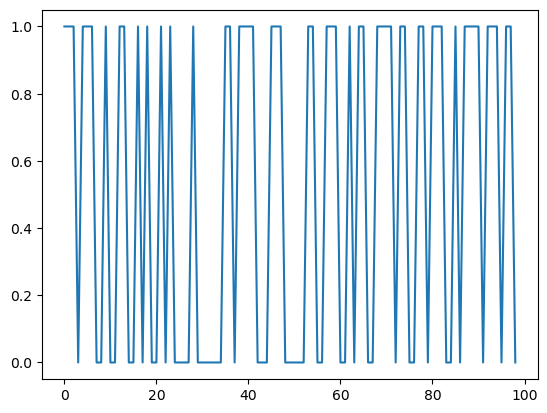

In [17]:
plt.plot(np.real(signal_QM[1:100]))